In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
940,2020-07-10,United Kingdom,287967.0,287621.0,44709.0,44602.0,346.0,107.0
941,2020-07-10,Germany,198250.0,198178.0,9068.0,9054.0,72.0,14.0
942,2020-07-10,Iran,251629.0,250458.0,12259.0,12305.0,1171.0,-46.0
943,2020-07-10,Turkey,209941.0,209962.0,5300.0,5300.0,-21.0,0.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2786.9068783068783
RMSE =  6792.216374754376


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  305.75555555555553
RMSE =  705.9317659668378


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13986.402173913044
RMSE =  17973.33783843023
-- World performances for deaths --
MAE =  1570.5760869565217
RMSE =  1909.5342677116892


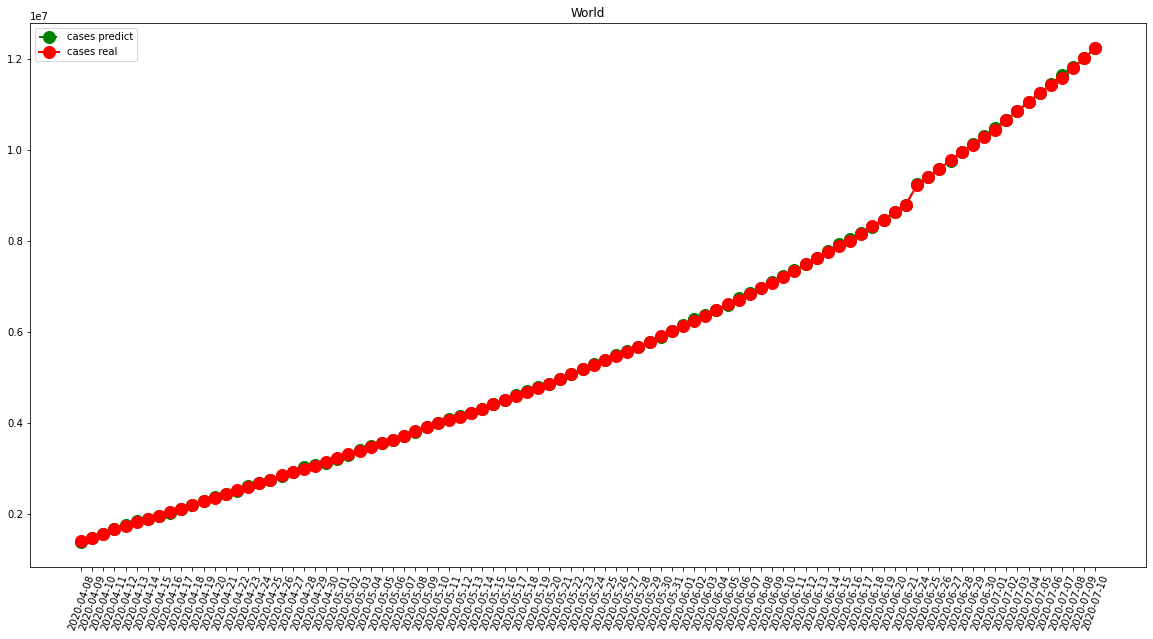

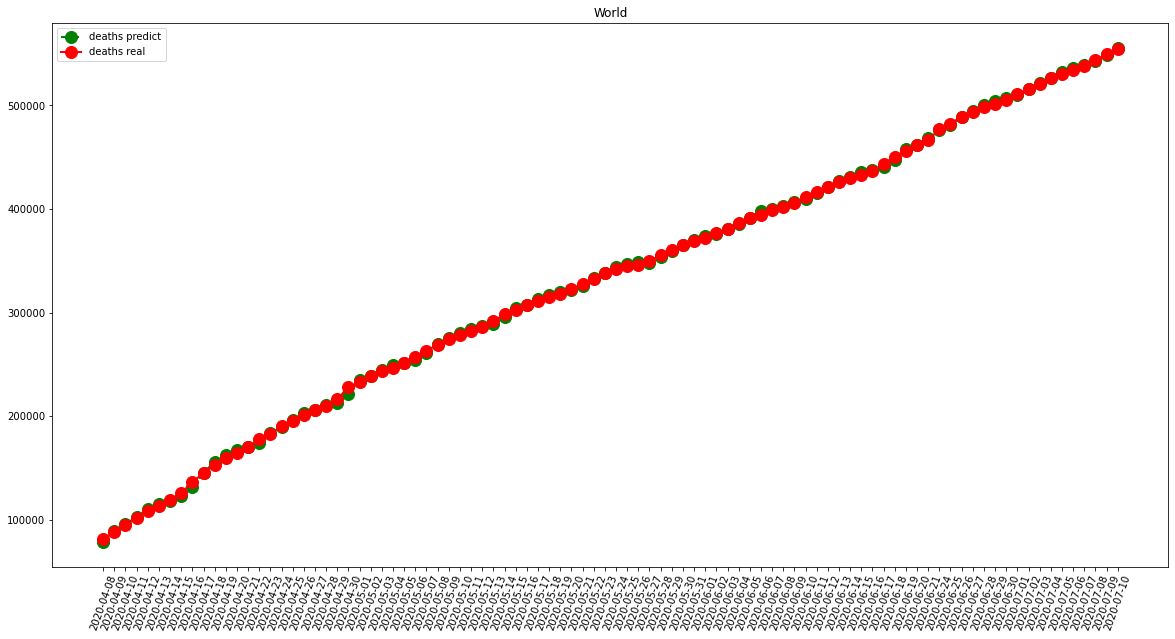

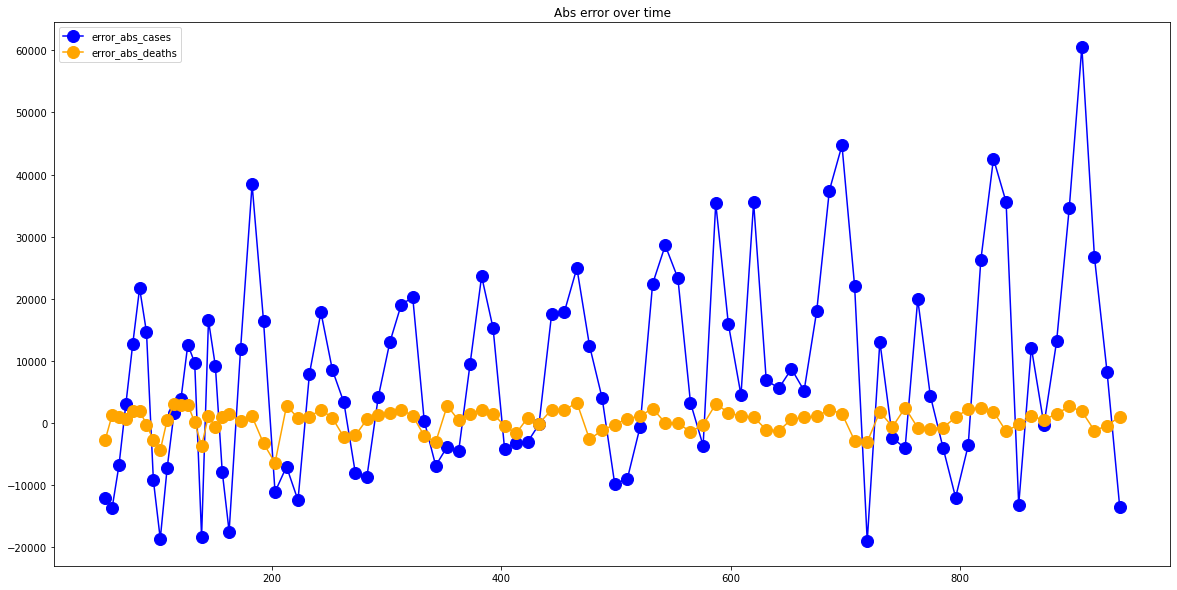

In [7]:
visShow("World")

-- France performances for cases --
MAE =  866.4901960784314
RMSE =  1435.5673948296678
-- France performances for deaths --
MAE =  173.19607843137254
RMSE =  331.652871917281


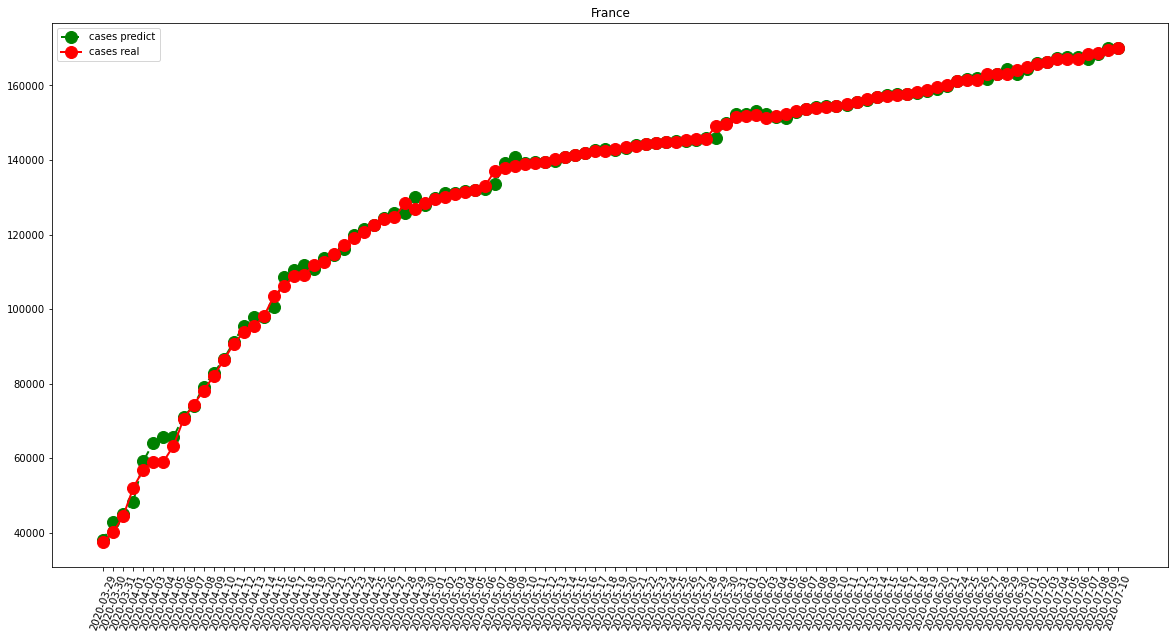

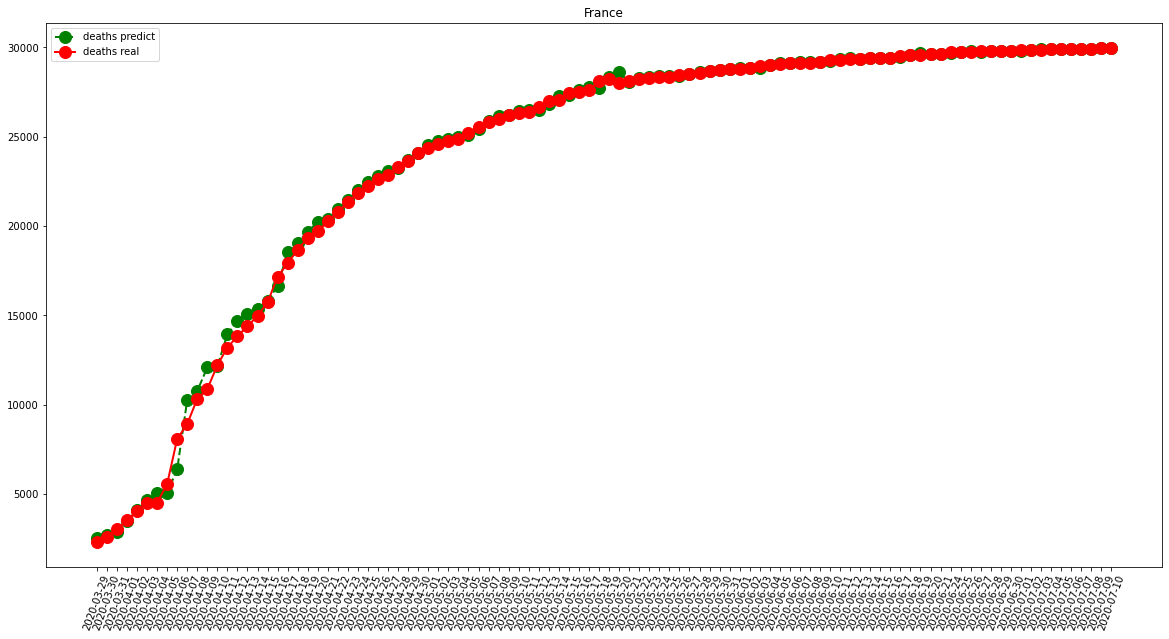

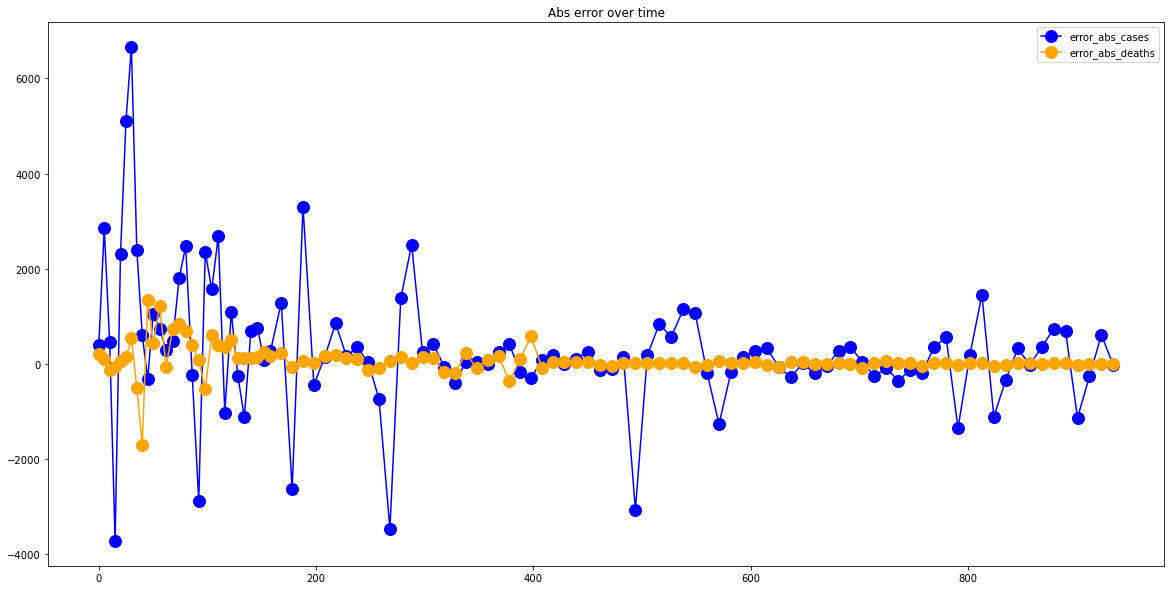

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  367.1078431372549
RMSE =  537.4086242439404
-- Italy performances for deaths --
MAE =  96.08823529411765
RMSE =  292.84733023117934


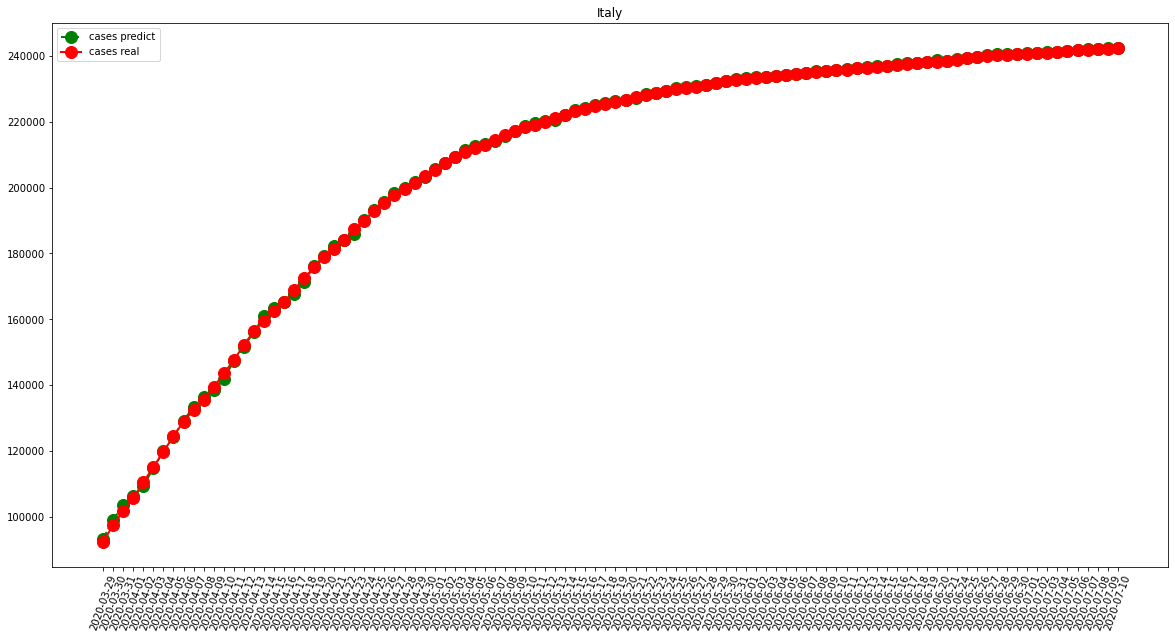

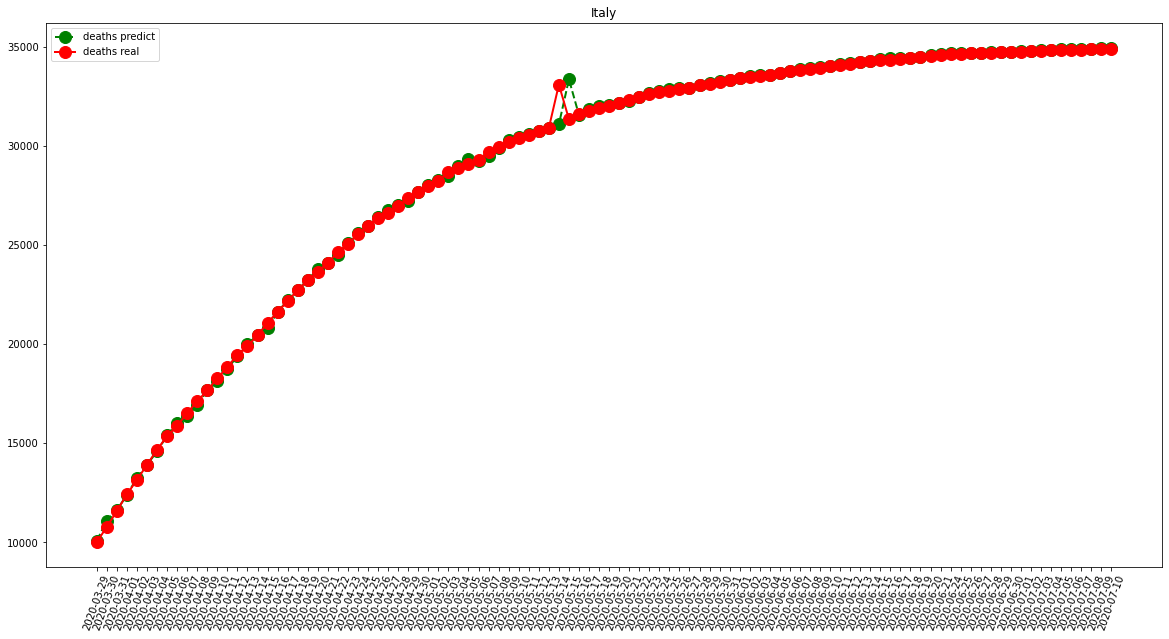

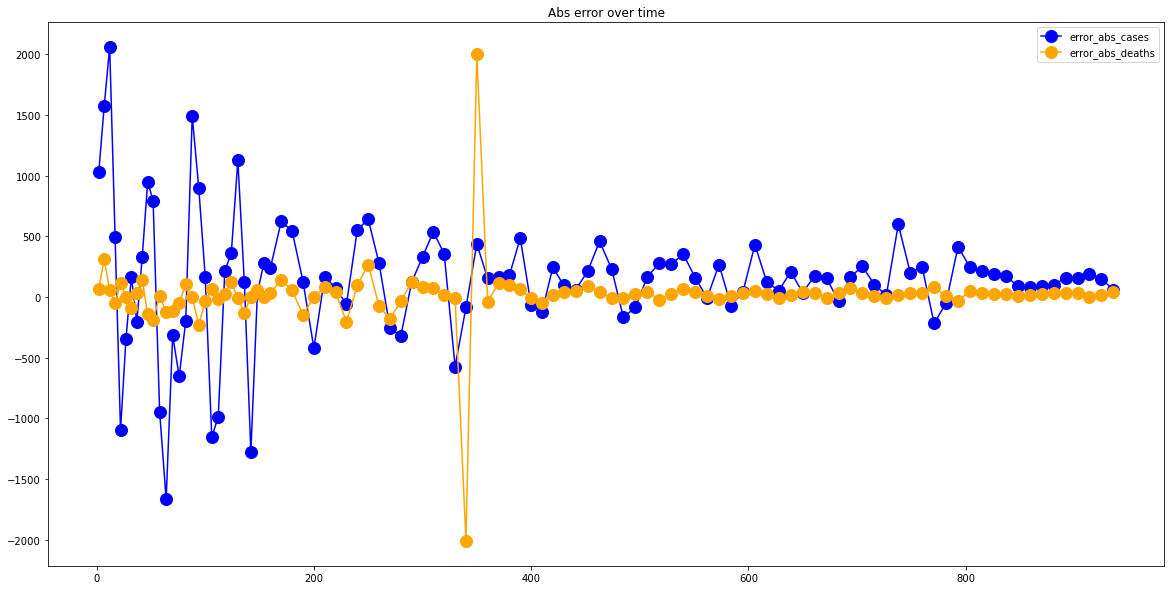

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  845.5
RMSE =  2029.8302425881554
-- Spain performances for deaths --
MAE =  178.1078431372549
RMSE =  401.8884222288179


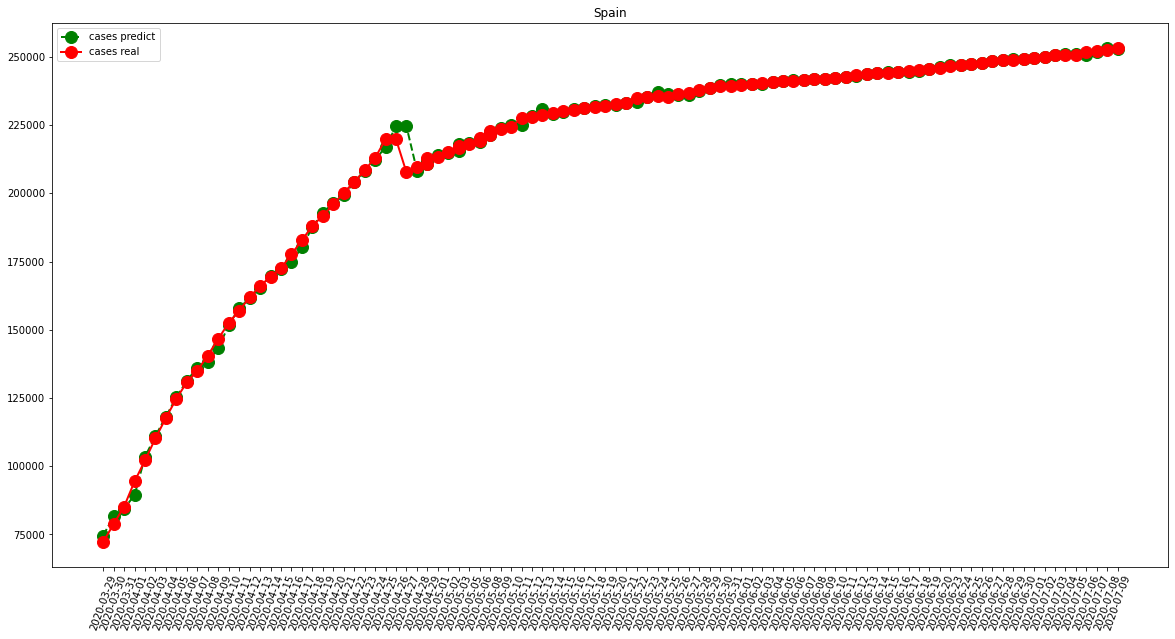

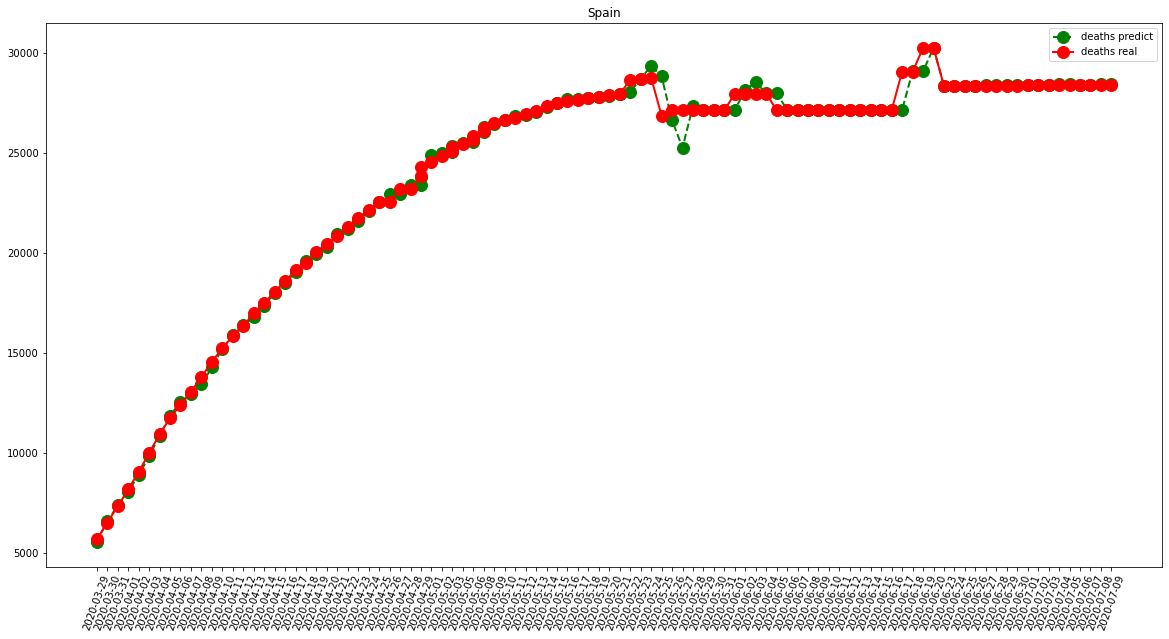

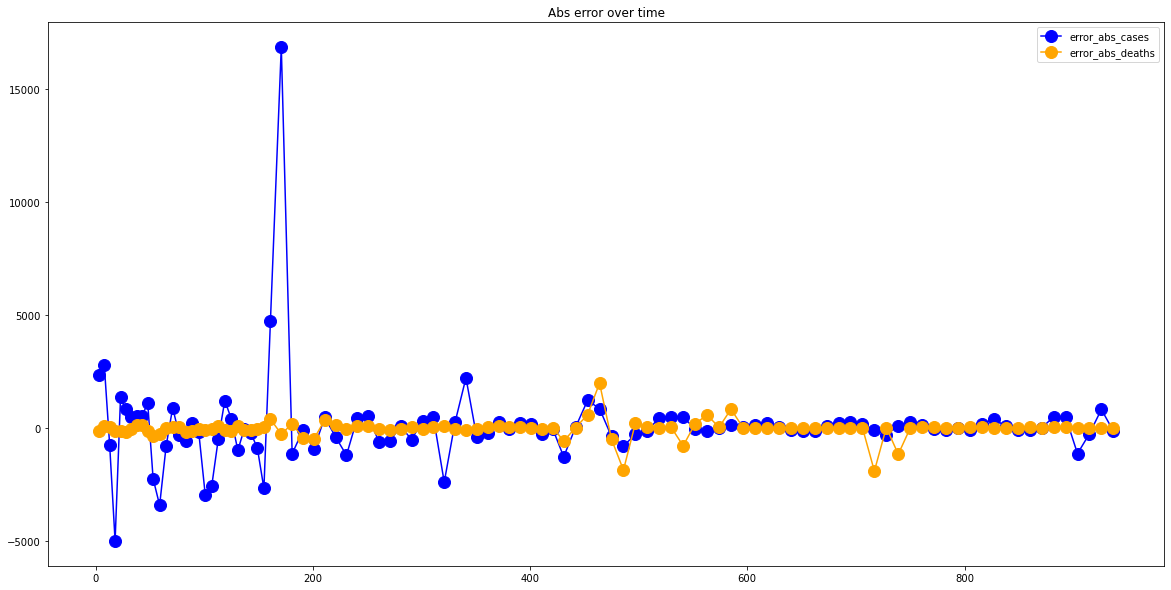

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5056.892156862745
RMSE =  6871.702591061403
-- United States performances for deaths --
MAE =  532.4509803921569
RMSE =  775.3271668697508


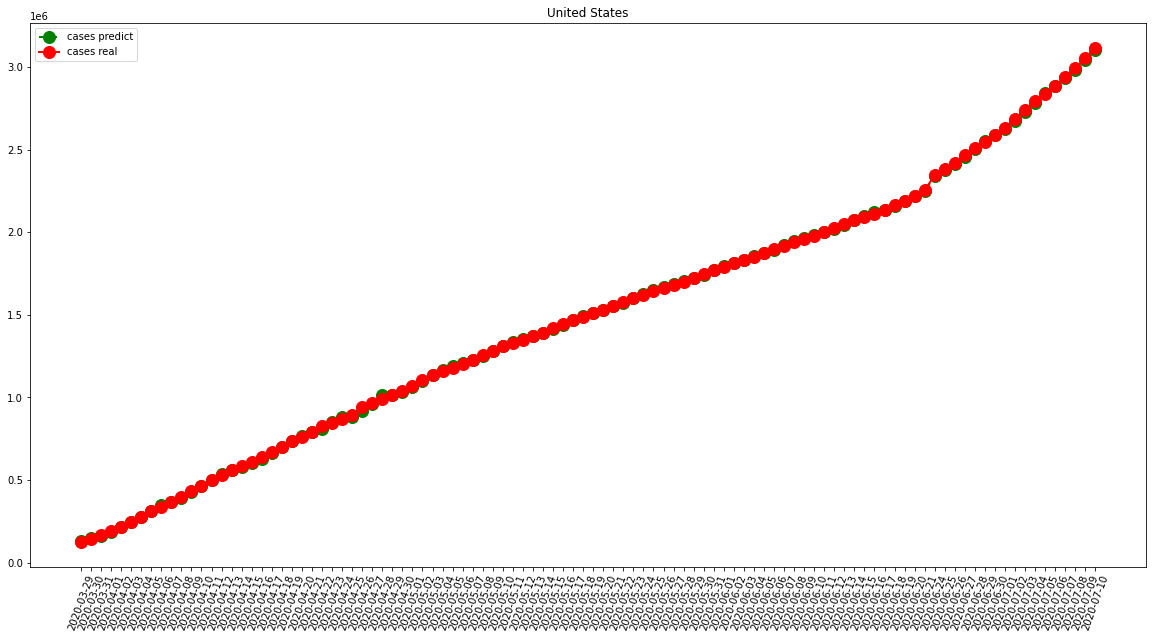

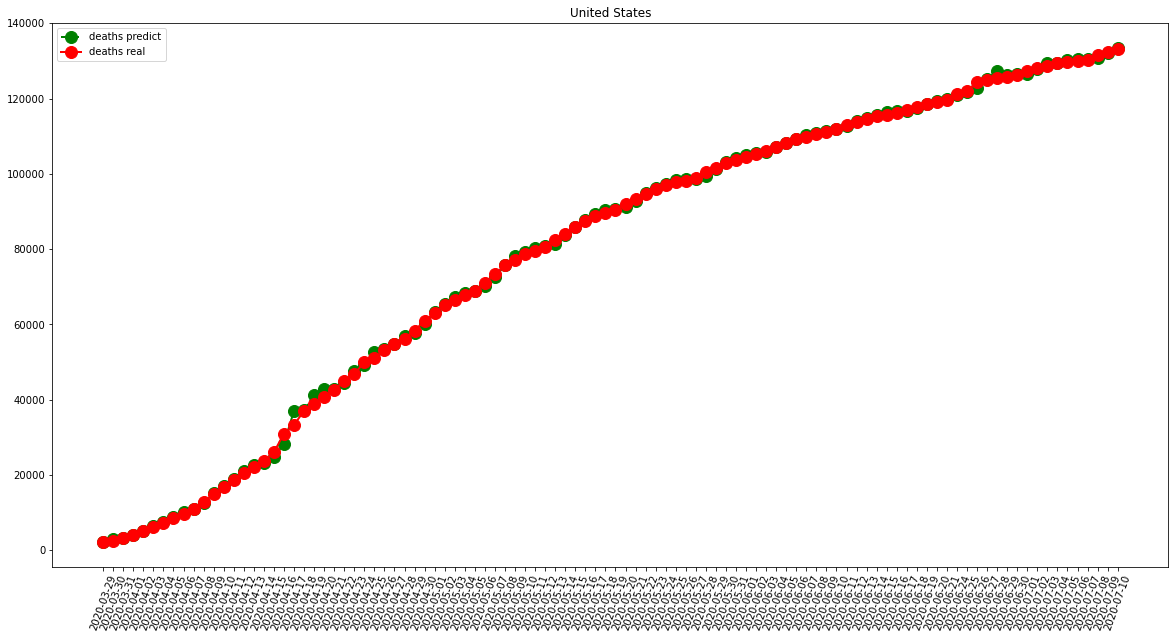

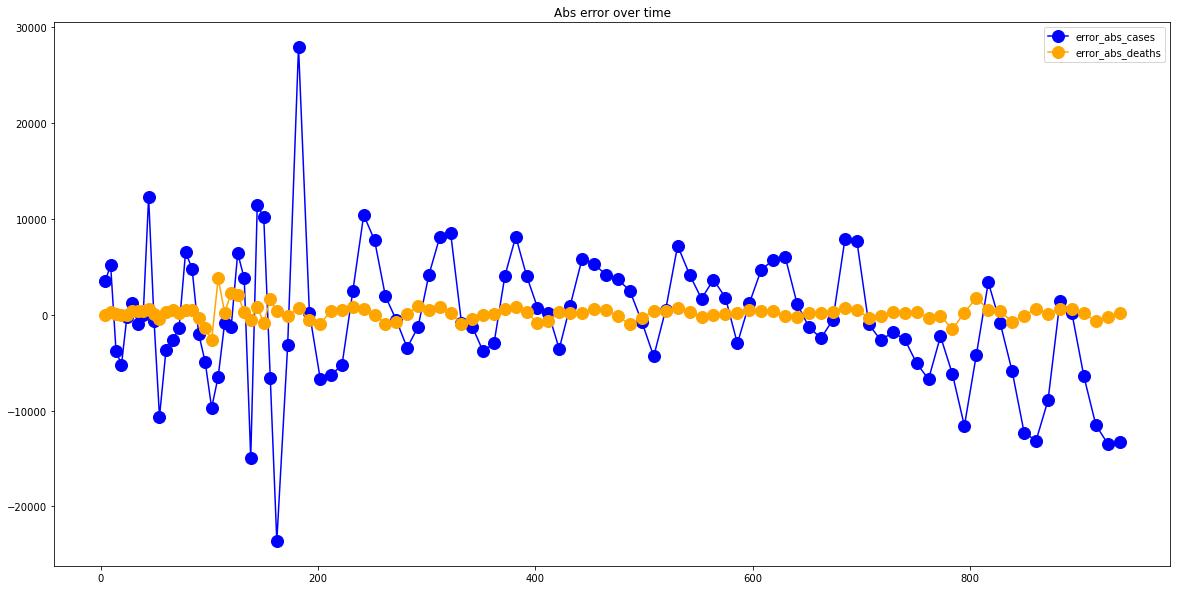

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  87.76470588235294
RMSE =  116.72751914390281
-- China performances for deaths --
MAE =  37.85294117647059
RMSE =  155.40998908011787


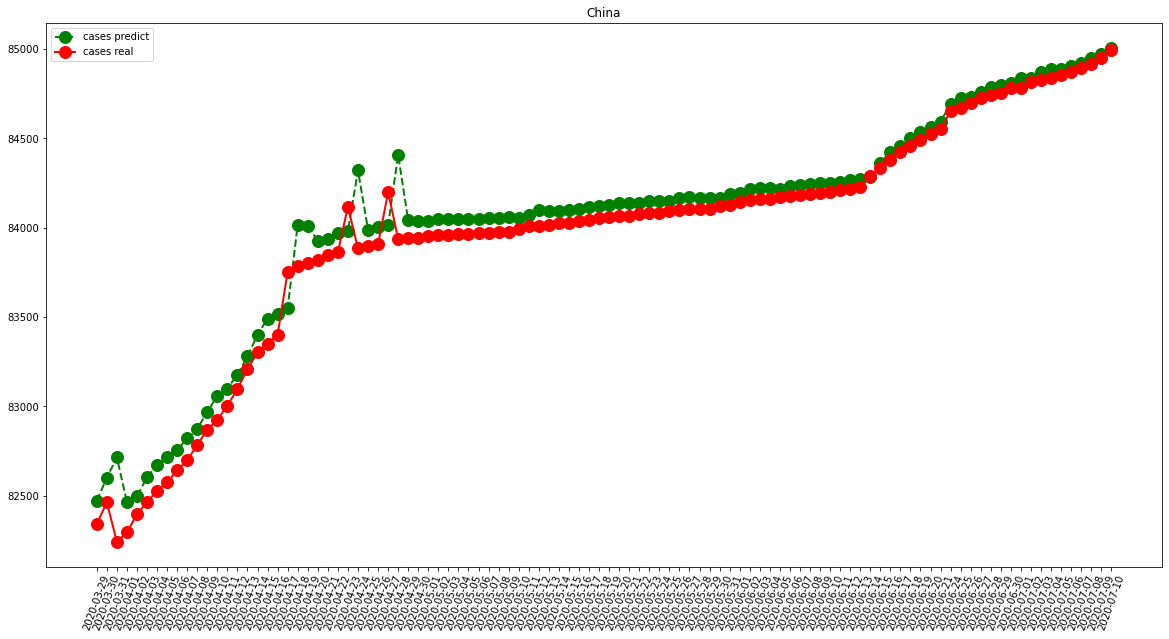

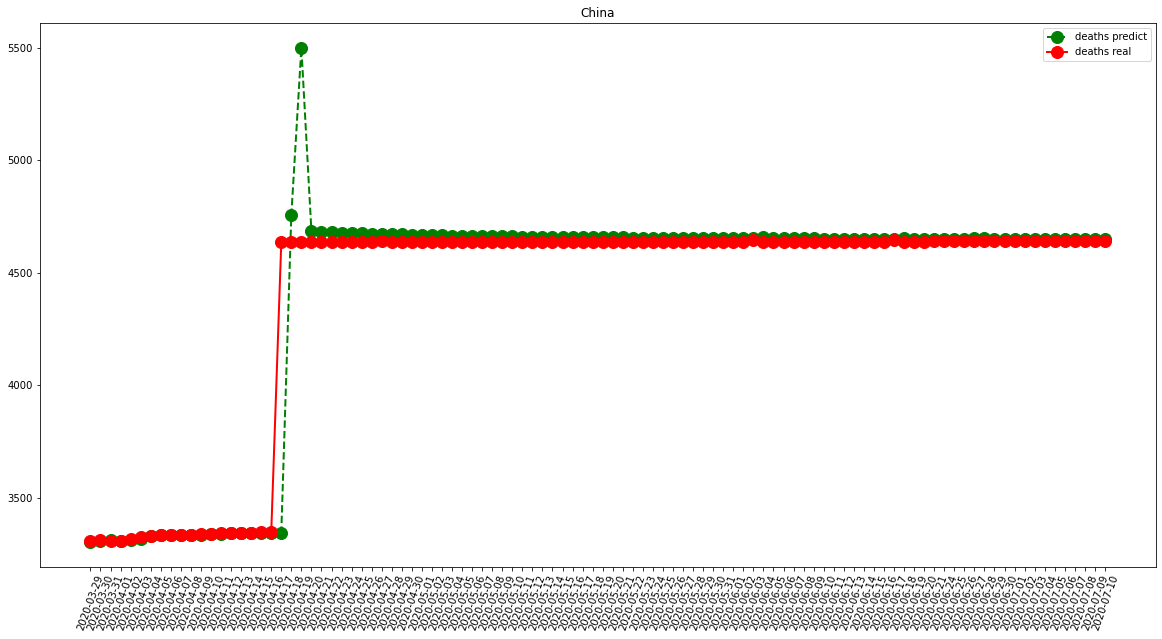

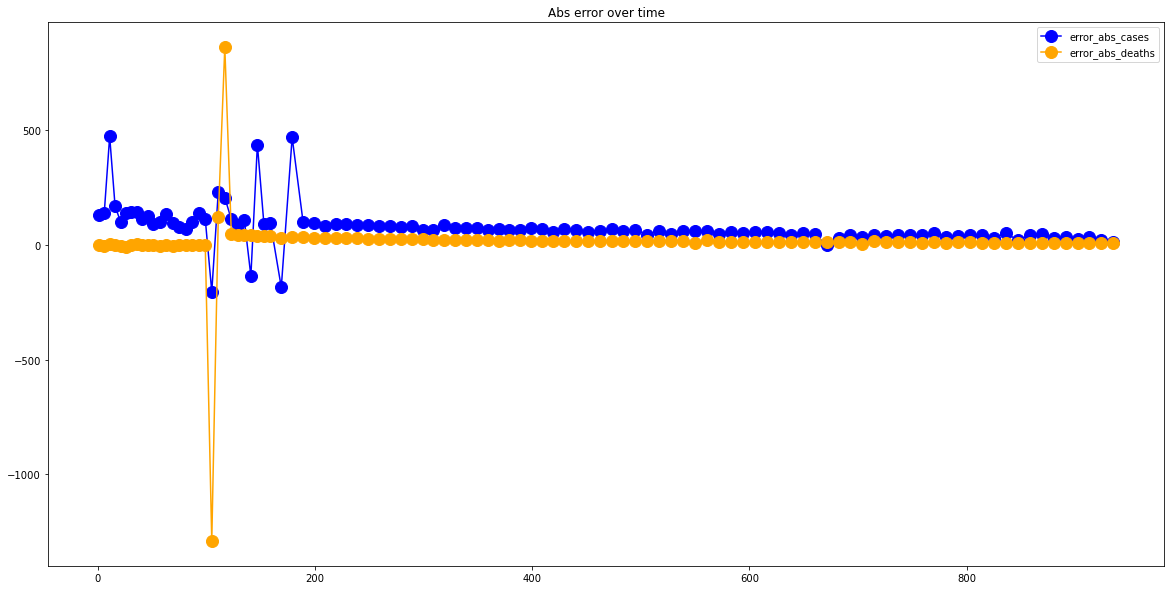

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1560.6216216216217
RMSE =  4847.69539561312
-- United Kingdom performances for deaths --
MAE =  239.21621621621622
RMSE =  568.7164305507433


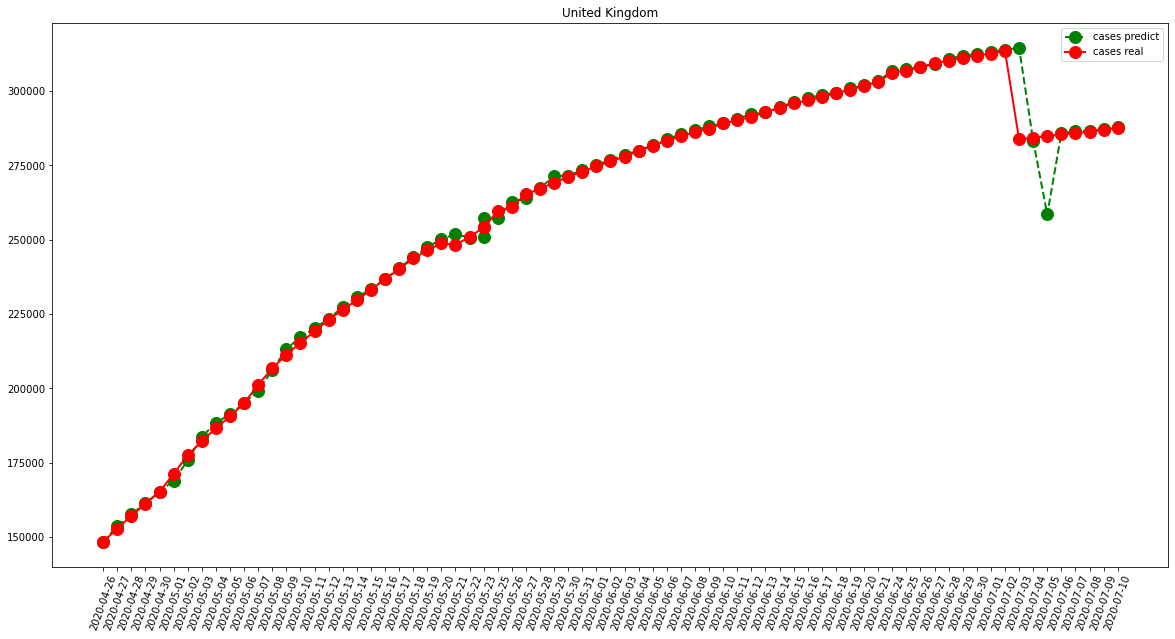

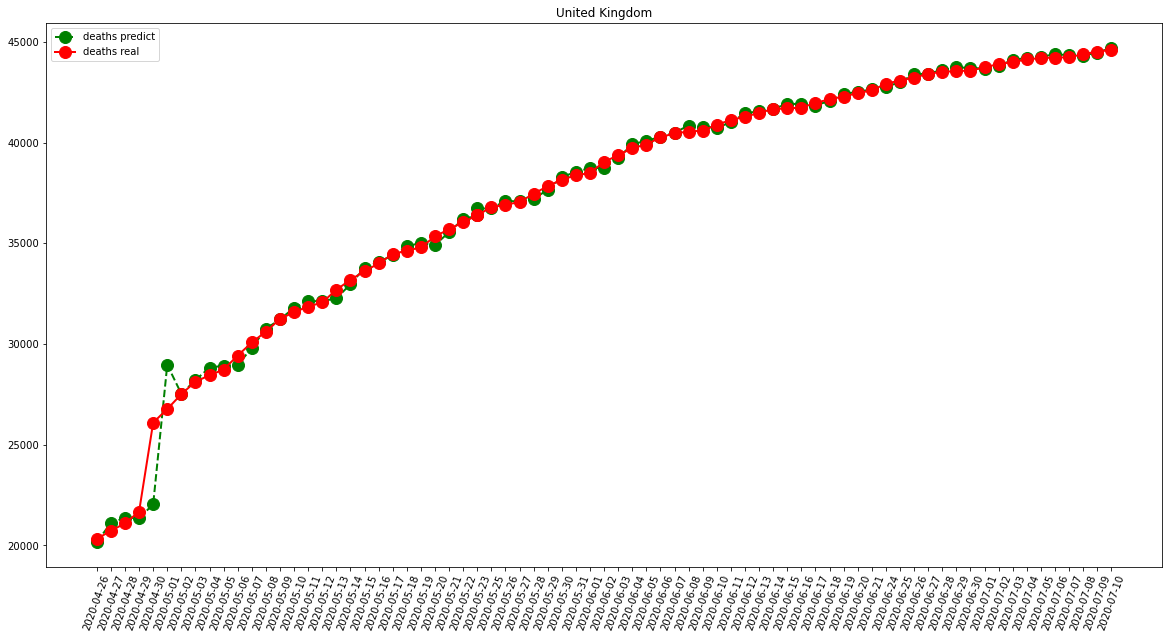

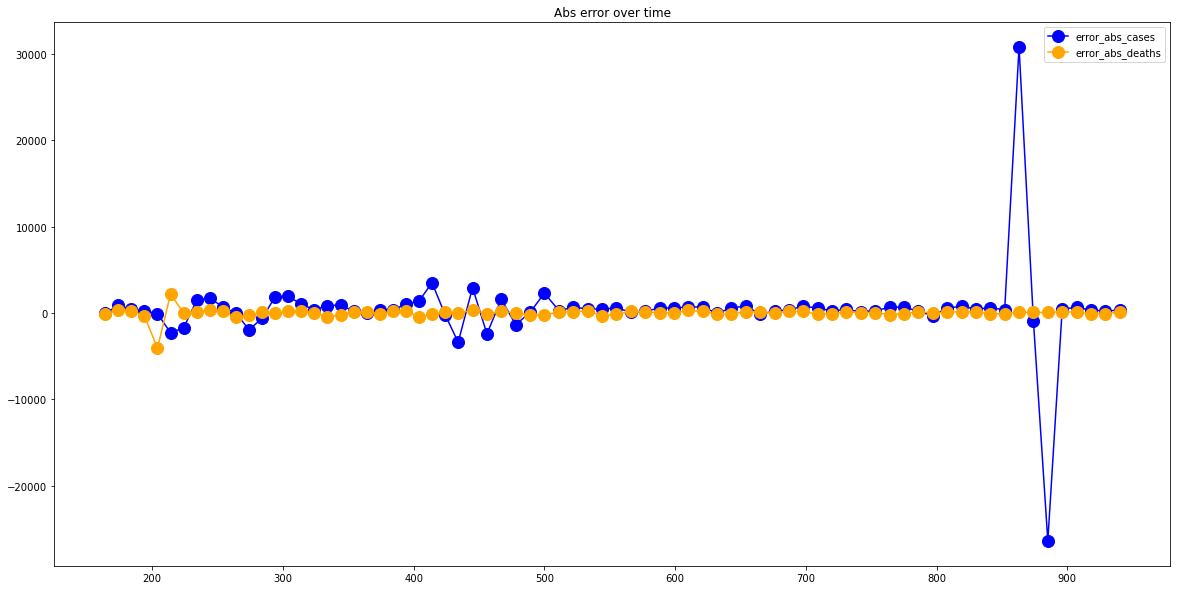

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  300.4594594594595
RMSE =  430.5186061836007
-- Germany performances for deaths --
MAE =  30.324324324324323
RMSE =  50.56438229383166


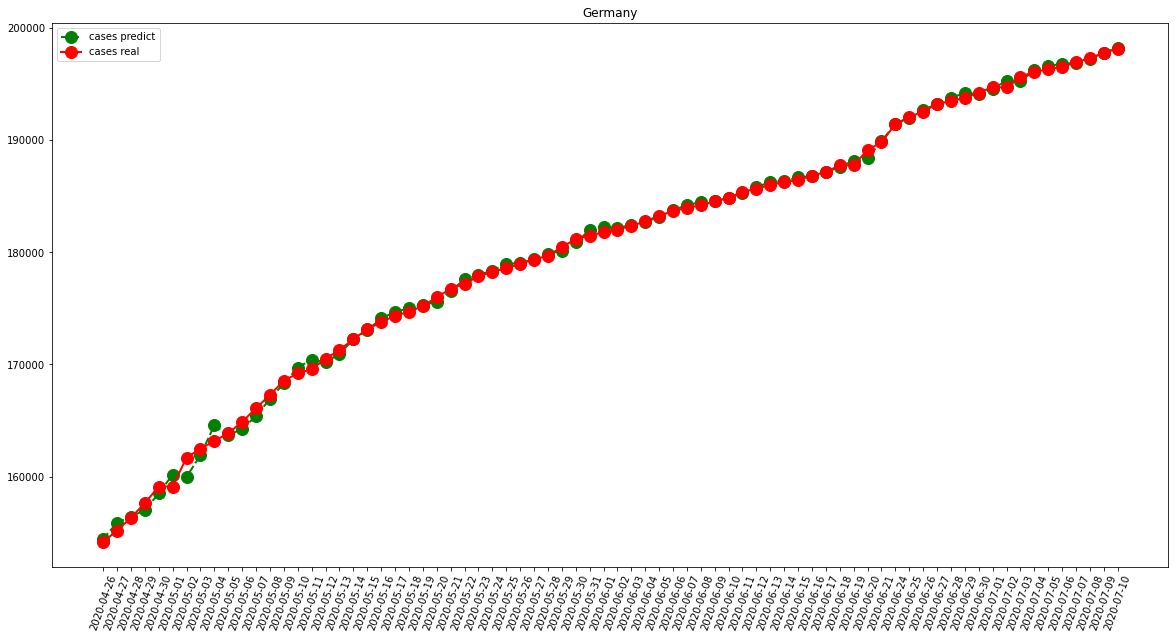

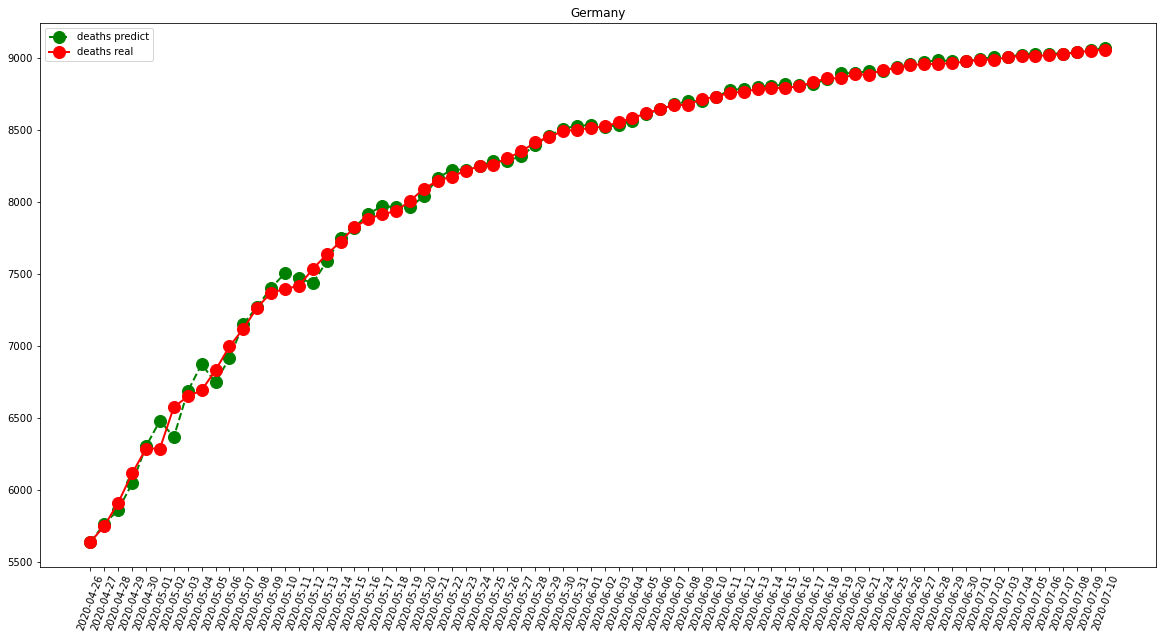

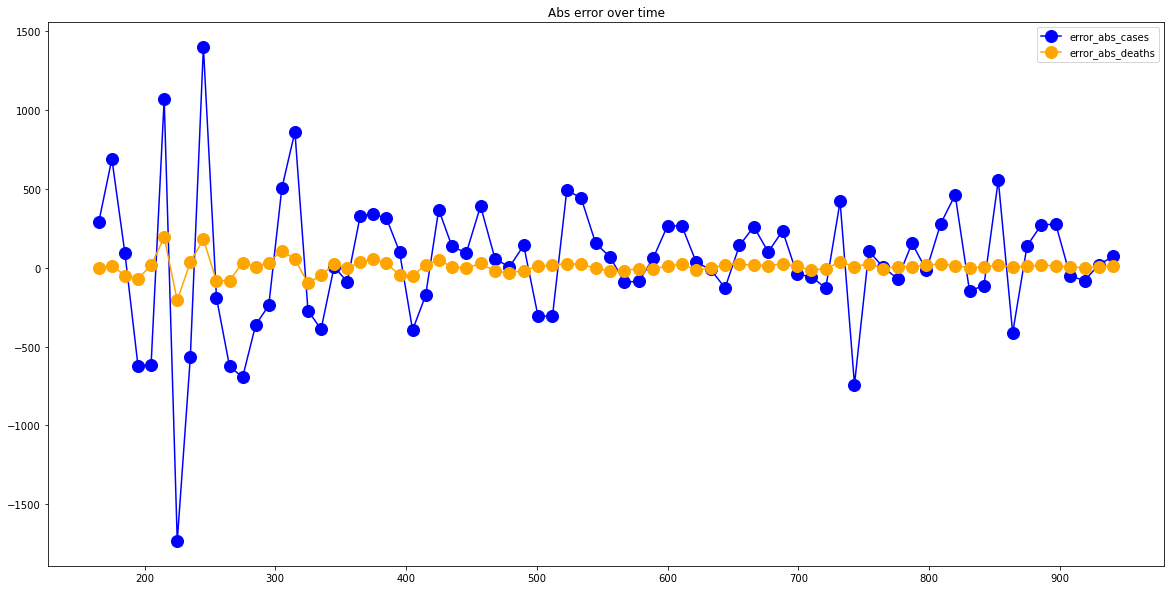

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  313.4054054054054
RMSE =  399.8697423046795
-- Iran performances for deaths --
MAE =  18.62162162162162
RMSE =  29.674814145914958


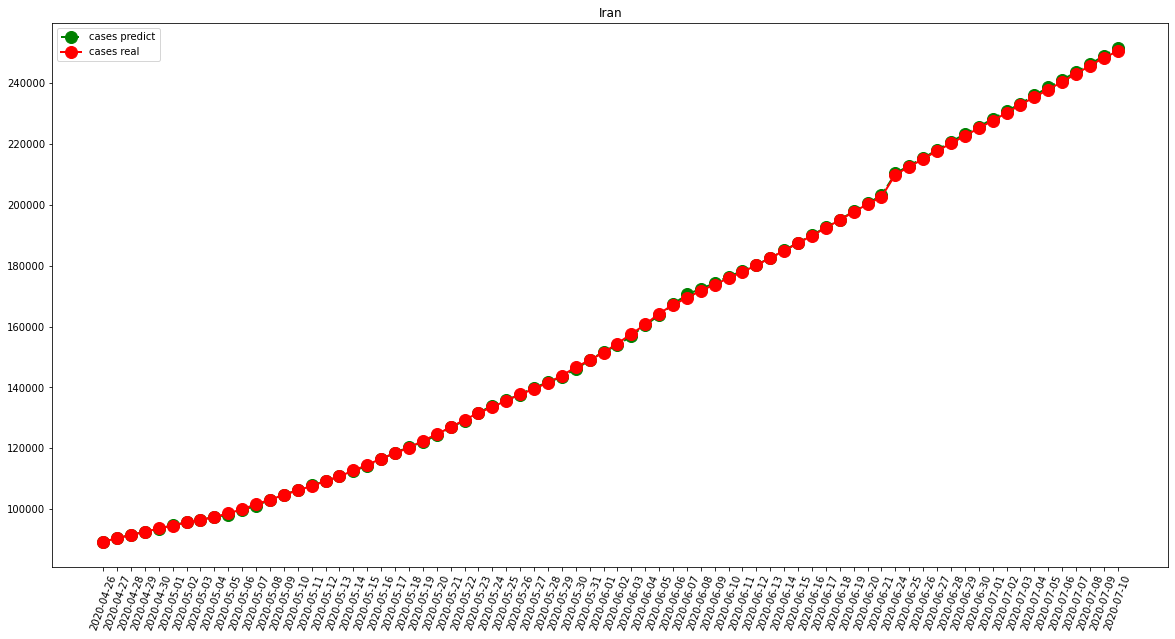

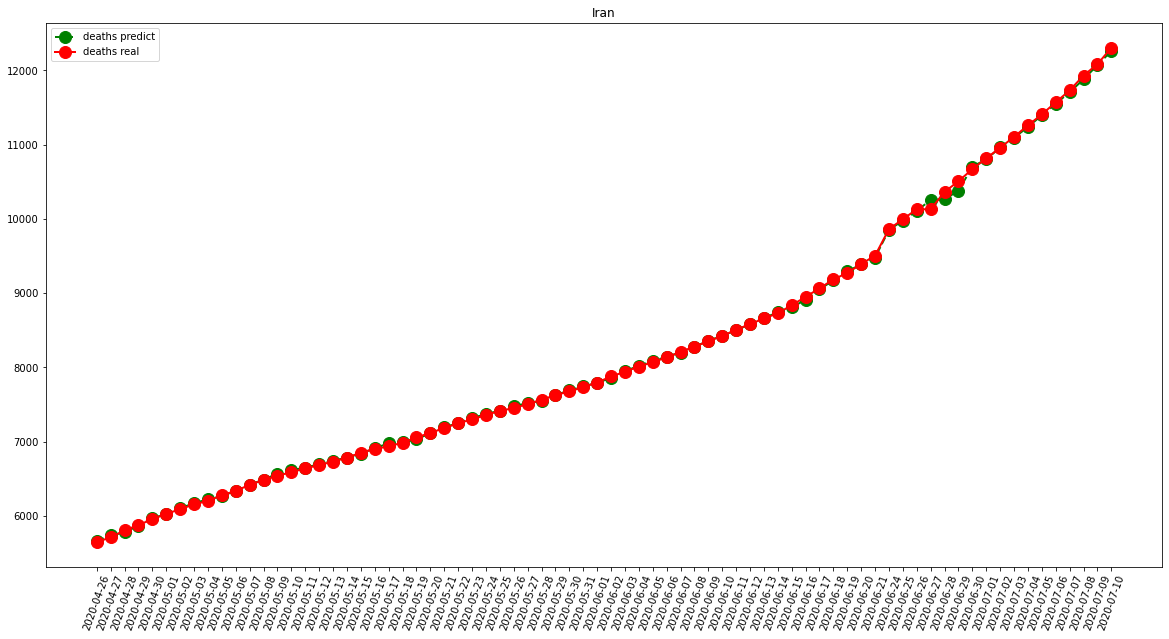

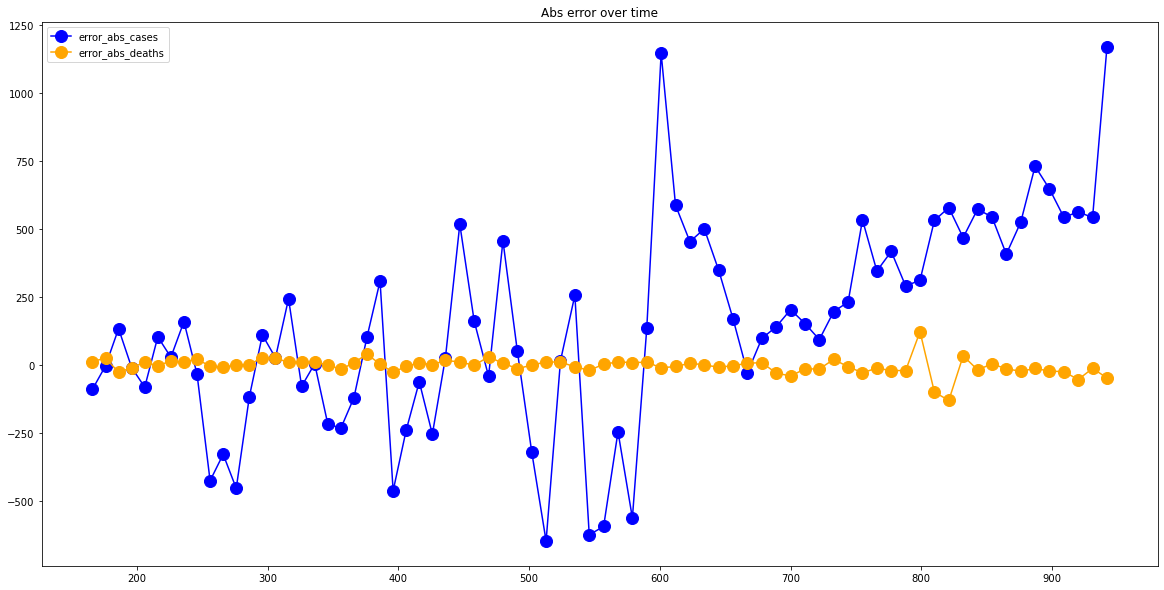

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  252.47297297297297
RMSE =  399.1636357536945
-- Turkey performances for deaths --
MAE =  24.945945945945947
RMSE =  117.99633526146113


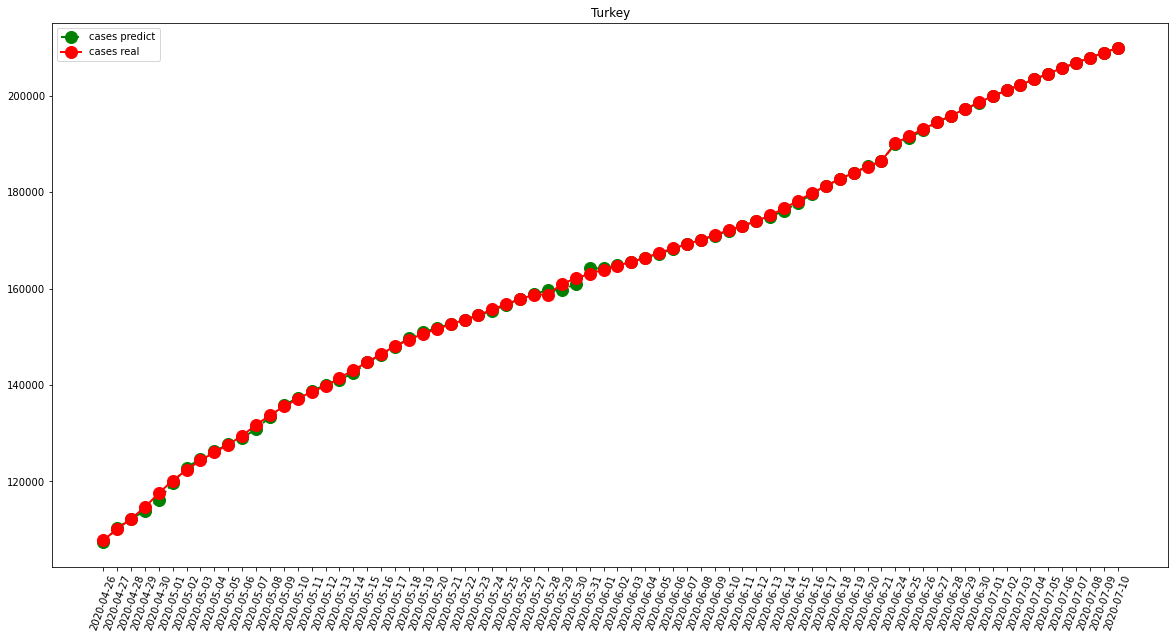

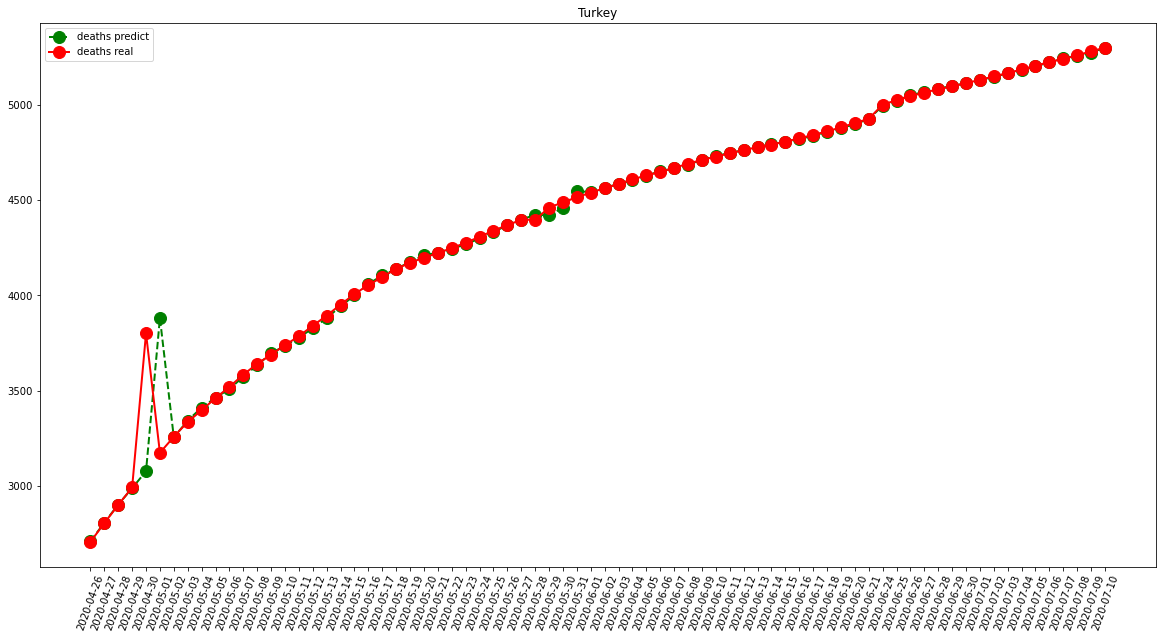

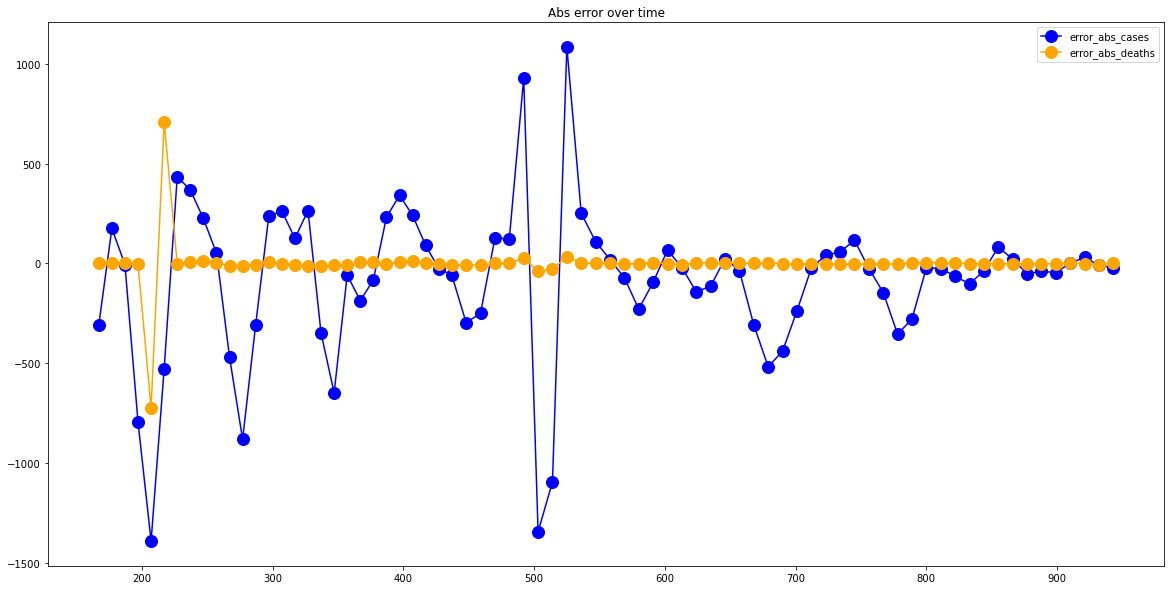

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9158.72340425532
RMSE =  11870.690841894157
-- Brazil performances for deaths --
MAE =  371.72340425531917
RMSE =  461.9573757623928


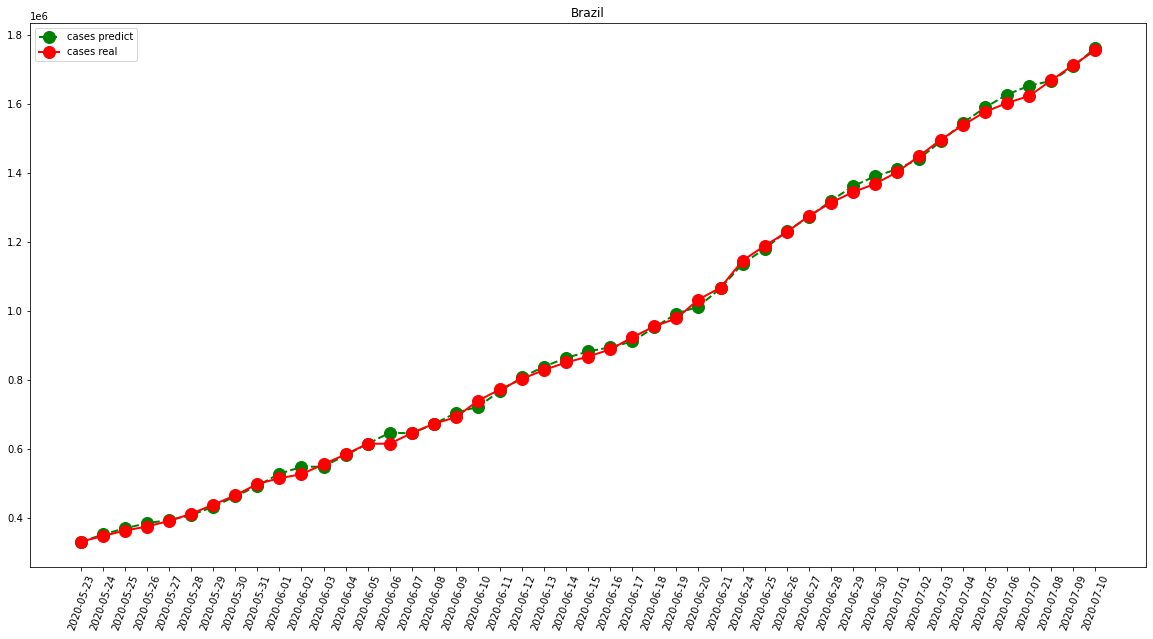

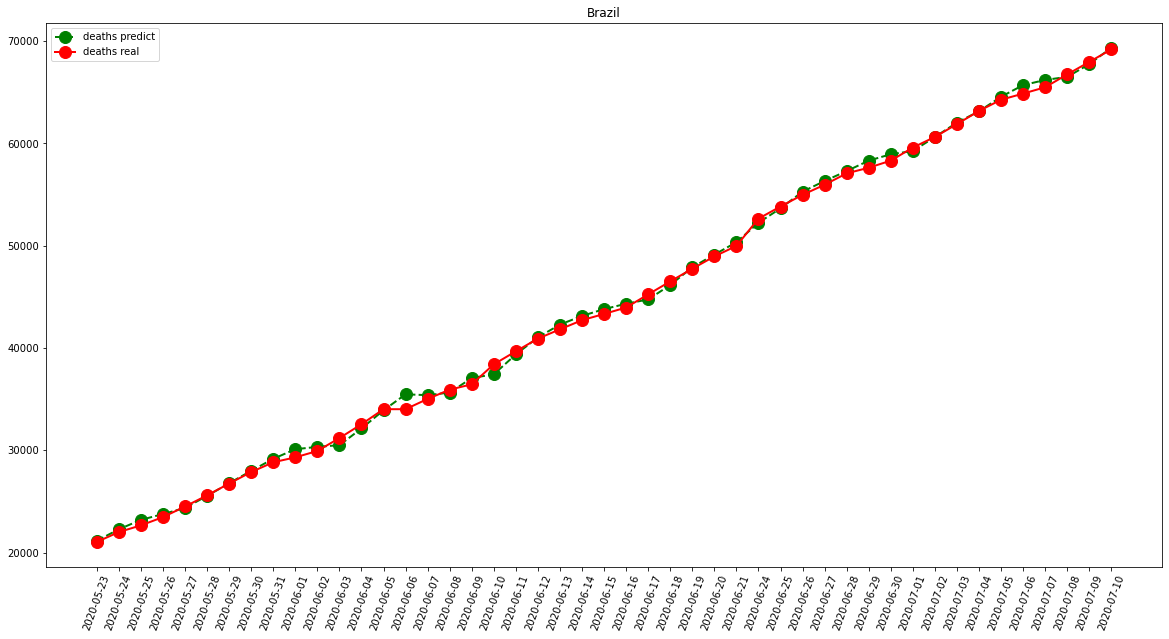

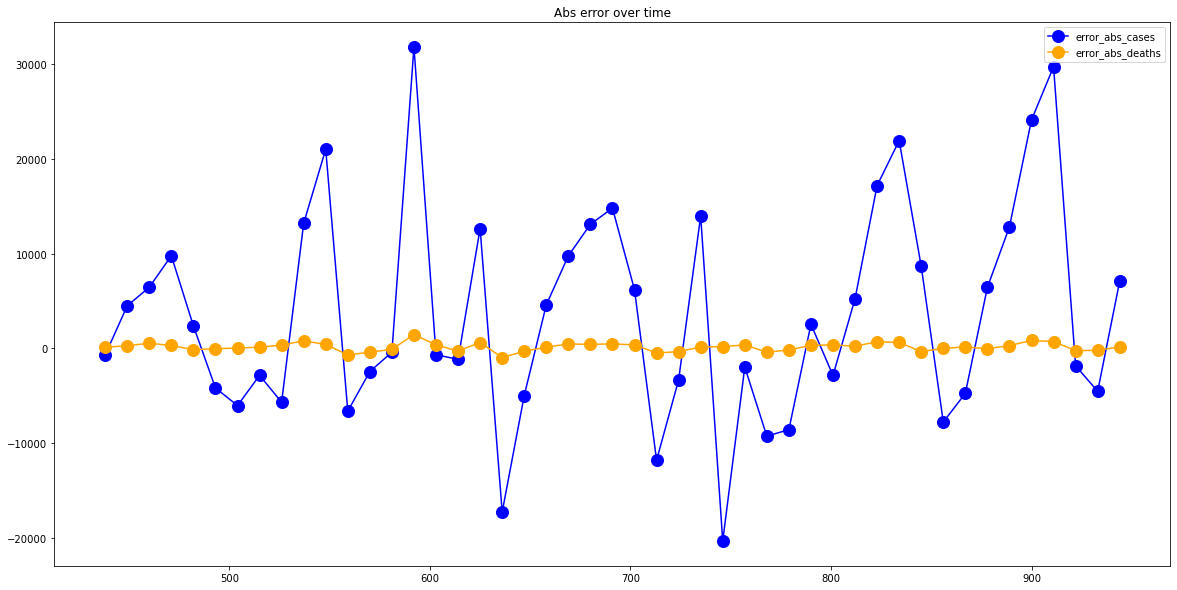

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)